In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [6]:
import FinanceDataReader as fdr

stock = fdr.DataReader('005930')
stock.tail

<bound method NDFrame.tail of              Open   High    Low  Close    Volume    Change
Date                                                      
1999-12-07   5500   5600   5420   5570    907656       NaN
1999-12-08   5560   5590   5400   5470    730112 -0.017953
1999-12-09   5360   5460   5310   5400   1092752 -0.012797
1999-12-10   5400   5480   5200   5320    847967 -0.014815
1999-12-13   5400   5400   5160   5160    926917 -0.030075
...           ...    ...    ...    ...       ...       ...
2024-03-25  79600  79800  77800  78200  18703996 -0.008872
2024-03-26  79700  80100  79200  79900  30551494  0.021739
2024-03-27  79200  80000  79200  79800  17424595 -0.001252
2024-03-28  79400  81000  79200  80800  25084812  0.012531
2024-03-29  81200  82500  80900  82400  26854527  0.019802

[6000 rows x 6 columns]>

In [7]:
stock.index

DatetimeIndex(['1999-12-07', '1999-12-08', '1999-12-09', '1999-12-10',
               '1999-12-13', '1999-12-14', '1999-12-15', '1999-12-16',
               '1999-12-17', '1999-12-20',
               ...
               '2024-03-18', '2024-03-19', '2024-03-20', '2024-03-21',
               '2024-03-22', '2024-03-25', '2024-03-26', '2024-03-27',
               '2024-03-28', '2024-03-29'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

Text(0, 0.5, 'price')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

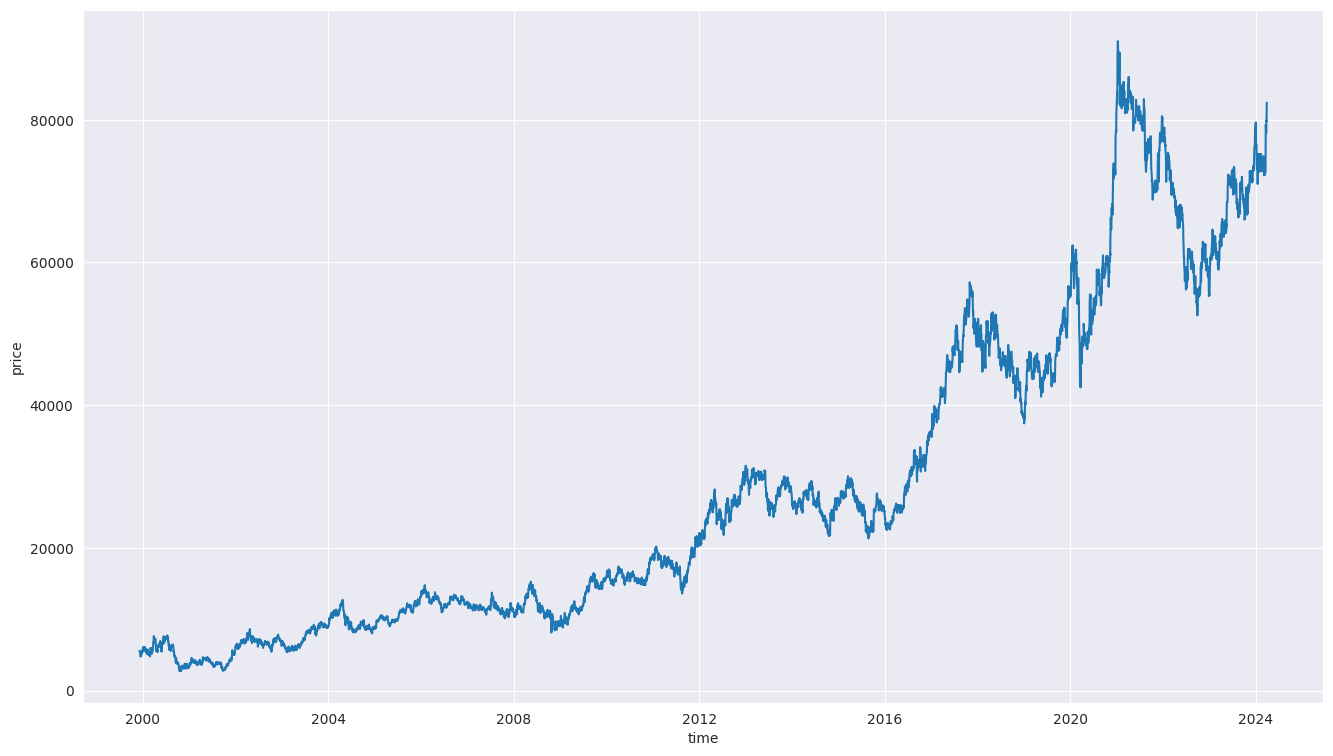

In [8]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

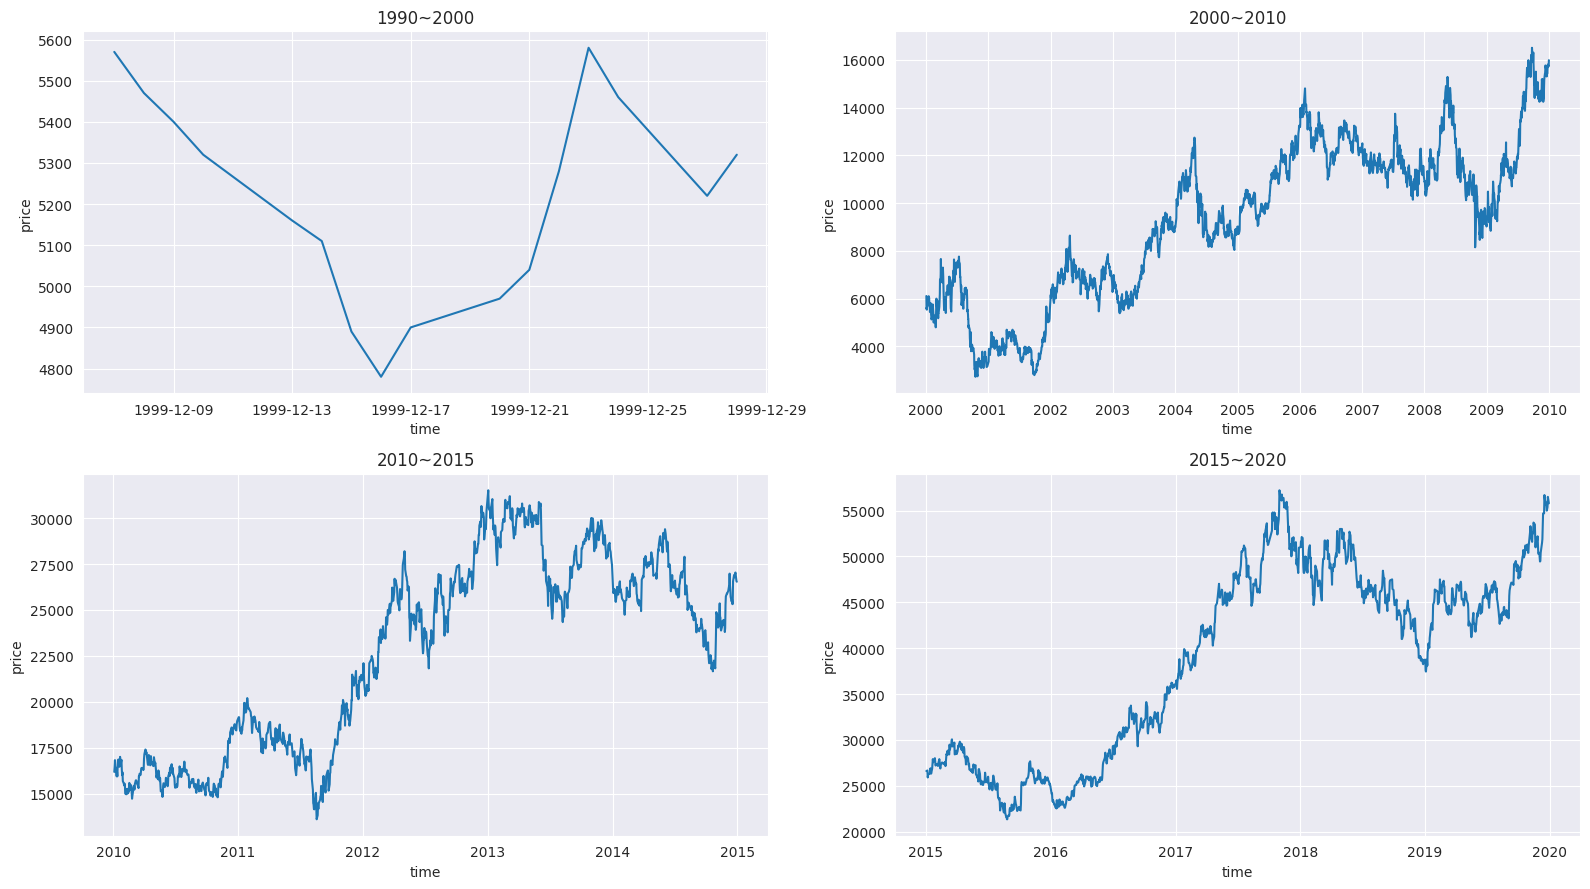

In [9]:
time_steps = [['1990', '2000'],
              ['2000', '2010'],
              ['2010', '2015'],
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.06090808, 0.05785124, 0.06055866, 0.03217401, 0.01005087],
       [0.06157254, 0.05774793, 0.0603352 , 0.03104112, 0.00808485],
       [0.0593577 , 0.05640496, 0.05932961, 0.0302481 , 0.01210052],
       ...,
       [0.87707641, 0.82644628, 0.8849162 , 0.87311657, 0.1929502 ],
       [0.87929125, 0.83677686, 0.8849162 , 0.88444545, 0.27777515],
       [0.89922481, 0.85227273, 0.90391061, 0.90257166, 0.29737198]])

In [14]:
df = pd.DataFrame(scaled, columns=scale_cols)
df.shape

(6000, 5)

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns= ['Close']), df['Close'], test_size=0.2, random_state=0, shuffle=False)

x_train.shape, y_train.shape
x_test.shape, y_test.shape

x_train

,Open,High,Low,Volume
0,0.060908,0.057851,0.060559,0.010051
1,0.061573,0.057748,0.060335,0.008085
2,0.059358,0.056405,0.059330,0.012101
3,0.059801,0.056612,0.058101,0.009390
4,0.059801,0.055785,0.057654,0.010264
...,...,...,...,...
4795,0.472868,0.444731,0.475419,0.084935
4796,0.468992,0.438017,0.462011,0.151571
4797,0.464563,0.434401,0.456425,0.147918
4798,0.461240,0.434917,0.464246,0.174433


In [19]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)



In [20]:
WINDOW_SIZE=20
BATCH_SIZE=32

# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


2024-03-30 16:57:17.814296: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-03-30 16:57:17.814319: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-30 16:57:17.814323: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-30 16:57:17.814344: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-30 16:57:17.814356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-03-30 16:57:17.933222: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(16, activation='tanh'),
    Dense(16, activation="relu"),
    Dense(1),
])

# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.weights.h5')
checkpoint = ModelCheckpoint(filename,
                             save_weights_only=True,
                             save_best_only=True,
                             monitor='val_loss',
                             verbose=1)

history = model.fit(train_data,
                    validation_data=(test_data),
                    epochs=50,
                    callbacks=[checkpoint, earlystopping])


Epoch 1/50


2024-03-30 17:06:54.092268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


    150/Unknown 5s 22ms/step - loss: 2.6935e-04 - mse: 5.3871e-04

2024-03-30 17:06:58.954358: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:06:58.954377: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:06:58.954381: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:06:58.954385: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 18131872599806388090
2024-03-30 17:06:58.954389: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16811958245300185360
2024-03-30 17:06:58.954393: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9542881950819600958
2024-03-30 17:06:58.954396: I tensorflow/core/framework/local_rendezvo


Epoch 1: val_loss improved from inf to 0.00338, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 2.6857e-04 - mse: 5.3716e-04 - val_loss: 0.0034 - val_mse: 0.0069
Epoch 2/50
  4/150 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 6.5648e-05 - mse: 1.3130e-04

2024-03-30 17:06:59.343171: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:06:59.343188: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[compile_loss/huber_loss/Cast/_6]]
2024-03-30 17:06:59.343193: I tensorflow/core/framework/local_rendezvous.cc:426] Local rendezvous send item cancelled. Key hash: 12990079257970322301
2024-03-30 17:06:59.343196: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9646211960863833209
2024-03-30 17:06:59.343202: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 14000019768387513094


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 2.8690e-05 - mse: 5.7378e-05
Epoch 2: val_loss improved from 0.00338 to 0.00279, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 2.8804e-05 - mse: 5.7609e-05 - val_loss: 0.0028 - val_mse: 0.0057
Epoch 3/50


2024-03-30 17:07:01.959132: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_10/_36]]
2024-03-30 17:07:01.959149: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:01.959152: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:01.959160: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:01.959164: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8501941051957344543
2024-03-30 17:07:01.959169: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 36525848

149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.0213e-05 - mse: 4.0426e-05
Epoch 3: val_loss improved from 0.00279 to 0.00158, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 2.0525e-05 - mse: 4.1043e-05 - val_loss: 0.0016 - val_mse: 0.0032
Epoch 4/50


2024-03-30 17:07:04.678831: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:04.678853: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/mod/_54]]
2024-03-30 17:07:04.678862: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:07:04.678866: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4067680430457537543
2024-03-30 17:07:04.678869: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1811825700939196383
2024-03-30 17:07:04.678872: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item c

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.0845e-05 - mse: 4.1691e-05
Epoch 4: val_loss did not improve from 0.00158
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2.1254e-05 - mse: 4.2507e-05 - val_loss: 0.0016 - val_mse: 0.0034
Epoch 5/50


2024-03-30 17:07:07.374231: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:07.374250: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/mod/_54]]
2024-03-30 17:07:07.374261: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:07:07.374267: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4067680430457537543
2024-03-30 17:07:07.374270: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1811825700939196383
2024-03-30 17:07:07.374274: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item c

149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9267e-05 - mse: 3.8534e-05
Epoch 5: val_loss improved from 0.00158 to 0.00132, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.9556e-05 - mse: 3.9105e-05 - val_loss: 0.0013 - val_mse: 0.0027
Epoch 6/50


2024-03-30 17:07:10.078934: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:10.078954: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/mod/_54]]
2024-03-30 17:07:10.078963: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:10.078970: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:07:10.078977: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:10.078982: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item ca

149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.7647e-05 - mse: 3.5295e-05
Epoch 6: val_loss did not improve from 0.00132
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.7898e-05 - mse: 3.5794e-05 - val_loss: 0.0013 - val_mse: 0.0027
Epoch 7/50


2024-03-30 17:07:12.778417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:12.778432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_6/_32]]
2024-03-30 17:07:12.778441: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:12.778450: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:12.778456: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:12.778460: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 64821374

147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.6652e-05 - mse: 3.3305e-05
Epoch 7: val_loss did not improve from 0.00132
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.7157e-05 - mse: 3.4316e-05 - val_loss: 0.0016 - val_mse: 0.0034
Epoch 8/50


2024-03-30 17:07:15.473593: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:15.473619: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:15.473622: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:15.473628: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_16/_42]]
2024-03-30 17:07:15.473631: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:07:15.473633: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 40676804304

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.9793e-05 - mse: 3.9584e-05
Epoch 8: val_loss improved from 0.00132 to 0.00060, saving model to tmp/ckeckpointer.weights.h5


2024-03-30 17:07:18.148685: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:18.148710: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:18.148713: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_8/_34]]
2024-03-30 17:07:18.148735: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:18.148745: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:18.148749: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 64821374

150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.9899e-05 - mse: 3.9797e-05 - val_loss: 6.0158e-04 - val_mse: 0.0012
Epoch 9/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.6215e-05 - mse: 3.2429e-05
Epoch 9: val_loss did not improve from 0.00060
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.6349e-05 - mse: 3.2698e-05 - val_loss: 0.0010 - val_mse: 0.0021
Epoch 10/50


2024-03-30 17:07:20.877893: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:20.877911: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:20.877914: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_14/_40]]
2024-03-30 17:07:20.877924: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:20.877932: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:20.877941: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.5406e-05 - mse: 3.0810e-05
Epoch 10: val_loss did not improve from 0.00060
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.5510e-05 - mse: 3.1018e-05 - val_loss: 6.0223e-04 - val_mse: 0.0012
Epoch 11/50


2024-03-30 17:07:23.557946: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:23.557969: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:23.557973: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:23.557978: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:23.557981: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:23.557988: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:23.557992: I tensorflow/core/framework/local_rendezv

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4603e-05 - mse: 2.9200e-05
Epoch 11: val_loss improved from 0.00060 to 0.00041, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.4720e-05 - mse: 2.9431e-05 - val_loss: 4.0848e-04 - val_mse: 8.3561e-04
Epoch 12/50


2024-03-30 17:07:26.251882: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:26.251897: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/zeros/_43]]
2024-03-30 17:07:26.251906: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17520787939613077835
2024-03-30 17:07:26.251910: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:07:26.251913: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4067680430457537543
2024-03-30 17:07:26.251916: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv ite

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4302e-05 - mse: 2.8604e-05
Epoch 12: val_loss improved from 0.00041 to 0.00041, saving model to tmp/ckeckpointer.weights.h5


2024-03-30 17:07:28.971139: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:28.971158: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:28.971166: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:28.971190: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:28.971200: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_12/_38]]
2024-03-30 17:07:28.971214: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549

150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.4401e-05 - mse: 2.8801e-05 - val_loss: 4.0779e-04 - val_mse: 8.3401e-04
Epoch 13/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3721e-05 - mse: 2.7439e-05
Epoch 13: val_loss did not improve from 0.00041
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.3816e-05 - mse: 2.7628e-05 - val_loss: 4.1852e-04 - val_mse: 8.5591e-04
Epoch 14/50


2024-03-30 17:07:31.697395: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:31.697411: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:31.697415: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:31.697418: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:31.697421: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:31.697424: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:31.697426: I tensorflow/core/framework/local_rendezv

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3950e-05 - mse: 2.7898e-05
Epoch 14: val_loss improved from 0.00041 to 0.00038, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.4052e-05 - mse: 2.8100e-05 - val_loss: 3.7568e-04 - val_mse: 7.6822e-04
Epoch 15/50


2024-03-30 17:07:34.402885: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:34.402903: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:34.402908: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:34.402911: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_2/_28]]
2024-03-30 17:07:34.402928: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 8501941051957344543
2024-03-30 17:07:34.402935: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 365258487

147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.3286e-05 - mse: 2.6573e-05
Epoch 15: val_loss improved from 0.00038 to 0.00024, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.3623e-05 - mse: 2.7247e-05 - val_loss: 2.3626e-04 - val_mse: 4.8338e-04
Epoch 16/50


2024-03-30 17:07:37.112778: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:37.112802: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:37.112807: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:37.112811: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 18131872599806388090
2024-03-30 17:07:37.112815: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16811958245300185360
2024-03-30 17:07:37.112818: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9542881950819600958
2024-03-30 17:07:37.112821: I tensorflow/core/framework/local_rendezvo

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4693e-05 - mse: 2.9385e-05
Epoch 16: val_loss did not improve from 0.00024
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.4976e-05 - mse: 2.9946e-05 - val_loss: 4.1321e-04 - val_mse: 8.4505e-04
Epoch 17/50


2024-03-30 17:07:39.819498: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:39.819517: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:39.819521: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:39.819524: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:39.819527: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:39.819530: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:39.819534: I tensorflow/core/framework/local_rendezv

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4346e-05 - mse: 2.8692e-05
Epoch 17: val_loss improved from 0.00024 to 0.00018, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.4418e-05 - mse: 2.8838e-05 - val_loss: 1.8106e-04 - val_mse: 3.7064e-04
Epoch 18/50


2024-03-30 17:07:42.513991: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:42.514009: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:42.514013: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:42.514017: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:42.514019: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:42.514024: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:42.514027: I tensorflow/core/framework/local_rendezv

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2572e-05 - mse: 2.5144e-05
Epoch 18: val_loss did not improve from 0.00018
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.2660e-05 - mse: 2.5320e-05 - val_loss: 2.7113e-04 - val_mse: 5.5450e-04
Epoch 19/50


2024-03-30 17:07:45.235388: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:45.235407: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:45.235411: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:45.235415: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:45.235419: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:45.235429: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/ad

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0725e-05 - mse: 2.1449e-05
Epoch 19: val_loss did not improve from 0.00018
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.0798e-05 - mse: 2.1596e-05 - val_loss: 2.0563e-04 - val_mse: 4.2042e-04
Epoch 20/50


2024-03-30 17:07:47.957920: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:47.957938: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:47.957944: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:47.957948: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 18131872599806388090
2024-03-30 17:07:47.957957: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16811958245300185360
2024-03-30 17:07:47.957964: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9542881950819600958
2024-03-30 17:07:47.957967: I tensorflow/core/framework/local_rendezvo

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0536e-05 - mse: 2.1071e-05
Epoch 20: val_loss improved from 0.00018 to 0.00013, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.0606e-05 - mse: 2.1213e-05 - val_loss: 1.3483e-04 - val_mse: 2.7586e-04
Epoch 21/50


2024-03-30 17:07:50.678305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:50.678321: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:50.678324: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:50.678328: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:50.678331: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:50.678334: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:50.678337: I tensorflow/core/framework/local_rendezv

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0997e-05 - mse: 2.1994e-05
Epoch 21: val_loss improved from 0.00013 to 0.00013, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.1219e-05 - mse: 2.2429e-05 - val_loss: 1.2988e-04 - val_mse: 2.6572e-04


2024-03-30 17:07:53.425744: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:53.425764: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:53.425767: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6234892885817404174
2024-03-30 17:07:53.425770: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:53.425773: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:07:53.425776: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:53.425779: I tensorflow/core/framework/local_rendezv

Epoch 22/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.1649e-05 - mse: 2.3298e-05
Epoch 22: val_loss did not improve from 0.00013
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.1727e-05 - mse: 2.3455e-05 - val_loss: 1.3253e-04 - val_mse: 2.7119e-04
Epoch 23/50


2024-03-30 17:07:56.245398: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:56.245416: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:07:56.245420: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:07:56.245423: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_12/_38]]
2024-03-30 17:07:56.245440: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4965973611058706900
2024-03-30 17:07:56.245444: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 85019410

147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0542e-05 - mse: 2.1084e-05
Epoch 23: val_loss did not improve from 0.00013
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.0768e-05 - mse: 2.1538e-05 - val_loss: 1.3692e-04 - val_mse: 2.8004e-04
Epoch 24/50


2024-03-30 17:07:59.022106: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:07:59.022131: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:07:59.022138: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:07:59.022143: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 18131872599806388090
2024-03-30 17:07:59.022148: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16811958245300185360
2024-03-30 17:07:59.022151: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9542881950819600958
2024-03-30 17:07:59.022154: I tensorflow/core/framework/local_rendezvo

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.3156e-06 - mse: 1.8631e-05
Epoch 24: val_loss improved from 0.00013 to 0.00012, saving model to tmp/ckeckpointer.weights.h5
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 9.5206e-06 - mse: 1.9040e-05 - val_loss: 1.2385e-04 - val_mse: 2.5342e-04
Epoch 25/50


2024-03-30 17:08:01.710771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:01.710793: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:08:01.710796: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/mod/_54]]
2024-03-30 17:08:01.710807: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:08:01.710813: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4067680430457537543
2024-03-30 17:08:01.710816: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item c

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0340e-05 - mse: 2.0680e-05
Epoch 25: val_loss did not improve from 0.00012
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.0527e-05 - mse: 2.1053e-05 - val_loss: 1.6306e-04 - val_mse: 3.3349e-04
Epoch 26/50


2024-03-30 17:08:04.438805: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:04.438825: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:08:04.438829: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:08:04.438832: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/zeros/_44]]
2024-03-30 17:08:04.438854: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17963339701084211915
2024-03-30 17:08:04.438858: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item

149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.9068e-06 - mse: 1.9814e-05
Epoch 26: val_loss did not improve from 0.00012
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.0015e-05 - mse: 2.0030e-05 - val_loss: 1.4030e-04 - val_mse: 2.8688e-04
Epoch 27/50


2024-03-30 17:08:07.141938: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:07.141958: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:07.141960: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_4/_30]]
2024-03-30 17:08:07.141969: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:08:07.141973: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17520787939613077835
2024-03-30 17:08:07.141979: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 40676804

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.7738e-06 - mse: 1.7548e-05
Epoch 27: val_loss improved from 0.00012 to 0.00010, saving model to tmp/ckeckpointer.weights.h5


2024-03-30 17:08:09.846062: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:09.846082: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/compile_loss/huber_loss/Cast/_46]]
2024-03-30 17:08:09.846092: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17520787939613077835
2024-03-30 17:08:09.846096: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:08:09.846100: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:09.846107: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. K

150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.9347e-06 - mse: 1.7871e-05 - val_loss: 9.8394e-05 - val_mse: 2.0157e-04
Epoch 28/50
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6764e-06 - mse: 1.7353e-05
Epoch 28: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.7363e-06 - mse: 1.7474e-05 - val_loss: 1.3173e-04 - val_mse: 2.6947e-04
Epoch 29/50


2024-03-30 17:08:12.573700: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:12.573717: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:12.573721: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:08:12.573724: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:08:12.573727: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:08:12.573730: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:08:12.573735: I tensorflow/core/framework/local_rendezv

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.7955e-06 - mse: 1.7591e-05
Epoch 29: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.8504e-06 - mse: 1.7702e-05 - val_loss: 1.0733e-04 - val_mse: 2.1960e-04
Epoch 30/50


2024-03-30 17:08:15.300510: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:15.300529: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:15.300533: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:08:15.300537: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:08:15.300540: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16811958245300185360
2024-03-30 17:08:15.300543: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6595769025094072700
2024-03-30 17:08:15.300547: I tensorflow/core/framework/local_rendez

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.3189e-06 - mse: 1.6638e-05
Epoch 30: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.4806e-06 - mse: 1.6963e-05 - val_loss: 1.3677e-04 - val_mse: 2.7978e-04
Epoch 31/50


2024-03-30 17:08:18.009750: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:18.009773: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/zeros/_43]]
2024-03-30 17:08:18.009794: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:08:18.009805: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:18.009807: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:08:18.009810: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv i

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.0544e-06 - mse: 1.6108e-05
Epoch 31: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.1065e-06 - mse: 1.6213e-05 - val_loss: 9.9564e-05 - val_mse: 2.0417e-04
Epoch 32/50


2024-03-30 17:08:20.688127: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:20.688145: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:20.688150: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:08:20.688154: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:08:20.688156: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/zeros/_43]]
2024-03-30 17:08:20.688168: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv i

148/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.7482e-06 - mse: 1.5496e-05
Epoch 32: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 7.9154e-06 - mse: 1.5832e-05 - val_loss: 1.4007e-04 - val_mse: 2.8764e-04
Epoch 33/50


2024-03-30 17:08:23.359341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:23.359362: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:08:23.359366: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:08:23.359370: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:08:23.359376: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:08:23.359379: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 16811958245300185360
2024-03-30 17:08:23.359382: W tensorflow/core/framework/local_rendezv

147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.5989e-06 - mse: 1.7198e-05
Epoch 33: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.8658e-06 - mse: 1.7723e-05 - val_loss: 1.2669e-04 - val_mse: 2.5912e-04
Epoch 34/50


2024-03-30 17:08:26.098490: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:26.098514: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:26.098517: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:08:26.098524: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:08:26.098527: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:08:26.098531: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:08:26.098535: I tensorflow/core/framework/local_rendezv

149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.0280e-05 - mse: 2.0560e-05
Epoch 34: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 1.0402e-05 - mse: 2.0801e-05 - val_loss: 1.1978e-04 - val_mse: 2.4522e-04
Epoch 35/50


2024-03-30 17:08:28.802104: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:28.802119: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/mod/_54]]
2024-03-30 17:08:28.802138: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:08:28.802142: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 4067680430457537543
2024-03-30 17:08:28.802145: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 1811825700939196383
2024-03-30 17:08:28.802148: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item c

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.9651e-06 - mse: 1.7930e-05
Epoch 35: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 9.0150e-06 - mse: 1.8031e-05 - val_loss: 1.4672e-04 - val_mse: 3.0011e-04
Epoch 36/50


2024-03-30 17:08:31.508794: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:31.508811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/gradient_tape/compile_loss/huber_loss/zeros/_43]]
2024-03-30 17:08:31.508818: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:31.508822: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:08:31.508825: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:08:31.508829: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv i

147/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.3243e-06 - mse: 1.6649e-05
Epoch 36: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 8.5157e-06 - mse: 1.7033e-05 - val_loss: 1.2094e-04 - val_mse: 2.4747e-04
Epoch 37/50


2024-03-30 17:08:34.174679: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:34.174701: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:08:34.174758: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:08:34.174764: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[StatefulPartitionedCall/adam/add_16/_42]]
2024-03-30 17:08:34.174768: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 5646126109346644697
2024-03-30 17:08:34.174771: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 40676804304

149/150 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.6490e-06 - mse: 1.5298e-05
Epoch 37: val_loss did not improve from 0.00010
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 7.7565e-06 - mse: 1.5514e-05 - val_loss: 1.1920e-04 - val_mse: 2.4403e-04


2024-03-30 17:08:36.868895: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-30 17:08:36.868913: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17294658616809795624
2024-03-30 17:08:36.868916: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 10066549851992117748
2024-03-30 17:08:36.868921: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 6482137414845817962
2024-03-30 17:08:36.868923: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 755141102391305700
2024-03-30 17:08:36.868927: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 17631531034258093192
2024-03-30 17:08:36.868935: I tensorflow/core/framework/local_rendezv

In [26]:
model.load_weights(filename)
pred = model.predict(test_data)
pred.shape

37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


2024-03-30 17:09:28.447600: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(1180, 1)

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Fon

hella


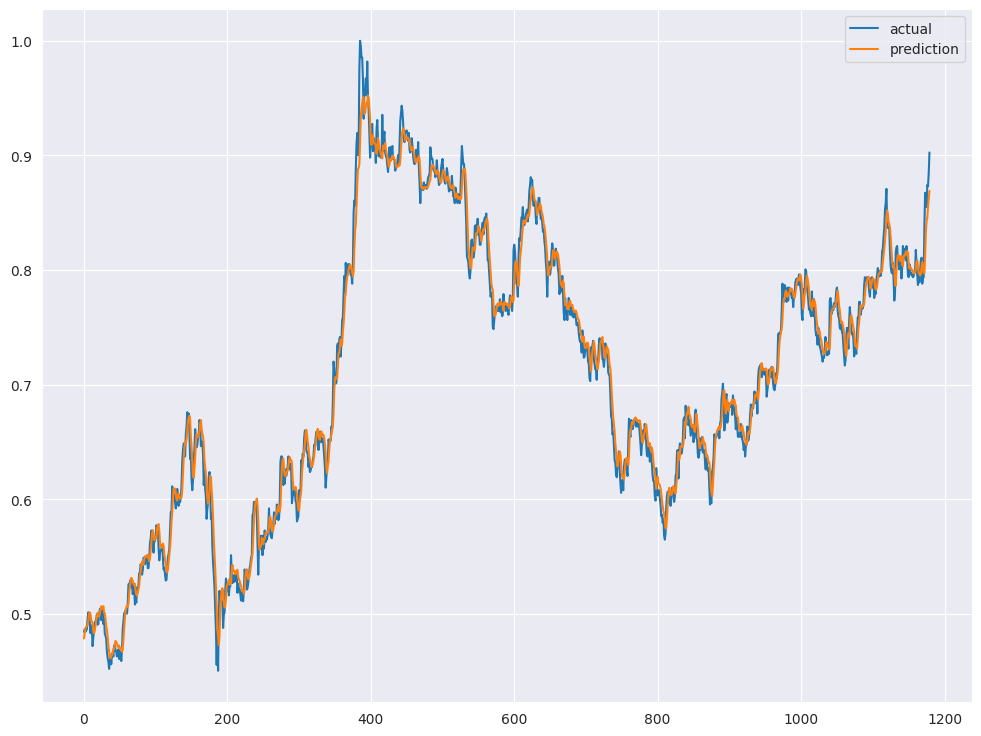

In [29]:
print('hella')
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()
